In [73]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      502041 non-null  int64  
 1   index           502041 non-null  int64  
 2   review          502041 non-null  float64
 3   text            502041 non-null  object 
 4   review_year     502041 non-null  int64  
 5   authors         502041 non-null  object 
 6   publisher       502041 non-null  object 
 7   categories      502041 non-null  object 
 8   published_year  502041 non-null  int64  
 9   helpfulness     502041 non-null  float64
 10  num_row         502041 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 42.1+ MB


In [75]:
df_rating_books_processed = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [76]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          502041 non-null  int64  
 1   num_row             502041 non-null  int64  
 2   text_clean          502038 non-null  object 
 3   compound_sentiment  502041 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ MB


In [77]:
df_vader_sentiment_processed = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment_processed.sample()

,num_row,text_clean,compound_sentiment
220763,220763,book contains series well written date essays ...,0.0258


In [78]:
df_all_data_processed = df_rating_books_processed.merge(df_vader_sentiment_processed, on='num_row', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               502041 non-null  int64  
 1   review              502041 non-null  float64
 2   text                502041 non-null  object 
 3   review_year         502041 non-null  int64  
 4   authors             502041 non-null  object 
 5   publisher           502041 non-null  object 
 6   categories          502041 non-null  object 
 7   published_year      502041 non-null  int64  
 8   helpfulness         502041 non-null  float64
 9   num_row             502041 non-null  int64  
 10  text_clean          502038 non-null  object 
 11  compound_sentiment  502041 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 46.0+ MB


In [79]:
#Original Text is removed as clean text is added
df_all_data_processed = df_all_data_processed.drop(['text'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               502041 non-null  int64  
 1   review              502041 non-null  float64
 2   review_year         502041 non-null  int64  
 3   authors             502041 non-null  object 
 4   publisher           502041 non-null  object 
 5   categories          502041 non-null  object 
 6   published_year      502041 non-null  int64  
 7   helpfulness         502041 non-null  float64
 8   num_row             502041 non-null  int64  
 9   text_clean          502038 non-null  object 
 10  compound_sentiment  502041 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 42.1+ MB


In [80]:
df_all_data_processed = df_all_data_processed.drop(['index'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review              502041 non-null  float64
 1   review_year         502041 non-null  int64  
 2   authors             502041 non-null  object 
 3   publisher           502041 non-null  object 
 4   categories          502041 non-null  object 
 5   published_year      502041 non-null  int64  
 6   helpfulness         502041 non-null  float64
 7   num_row             502041 non-null  int64  
 8   text_clean          502038 non-null  object 
 9   compound_sentiment  502041 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 38.3+ MB


In [81]:
df_all_data_processed = df_all_data_processed.drop(['num_row'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review              502041 non-null  float64
 1   review_year         502041 non-null  int64  
 2   authors             502041 non-null  object 
 3   publisher           502041 non-null  object 
 4   categories          502041 non-null  object 
 5   published_year      502041 non-null  int64  
 6   helpfulness         502041 non-null  float64
 7   text_clean          502038 non-null  object 
 8   compound_sentiment  502041 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 34.5+ MB


In [82]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [83]:
df_all_data_processed['authors'] = df_all_data_processed['authors'].apply(custom_string_to_list)
df_all_data_processed['categories'] = df_all_data_processed['categories'].apply(custom_string_to_list)

In [84]:
ordered_columns = ['authors', 'categories', 'publisher', 'published_year', 'review_year', 'helpfulness', 'text_clean','compound_sentiment', 'review']

In [85]:
df_all_data_processed = df_all_data_processed[ordered_columns]

In [86]:
df_all_data_processed.sample(10)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
24800,[Other],[Fiction],Penguin,2007,2008,0.000000,excellent watched tv series seen series eye...,0.5719,5.0
112741,[Other],[Business & Economics],Other,2007,2010,1.000000,interesting books wellresearched drag read muc...,0.7184,5.0
277551,[Other],[Other],Other,2010,1999,1.000000,european living london felt book gave misleadi...,-0.4019,1.0
186375,[Other],[Other],Other,2000,2004,0.300000,book bad plain embarassing needed book weekend...,-0.4291,1.0
284645,[Other],[Fiction],Other,2017,2008,1.000000,war worlds h g wellsthe war worlds one crownin...,-0.5106,5.0
364825,[Other],[Computers],Other,2017,1999,0.666667,book linux unleashed tries cover every linux t...,-0.1761,1.0
136389,[Other],[Other],Other,2016,2012,0.333333,usually try go english classes sense optimism ...,0.9853,2.0
89821,[Other],[Fiction],Other,2011,2006,1.000000,would want read the adventures jecosan tarres ...,0.9923,5.0
124663,[Other],[Other],Other,2021,2009,1.000000,book finehowever underlining highlighting make...,-0.3182,3.0
268830,[Other],[Fiction],Other,2021,2001,0.714286,pretty little victorian novel anne bronte near...,0.9865,4.0


# Analysis and EDA for target feature

In [87]:
df_all_data_processed['review'].value_counts()

review
5.0    300938
4.0     98069
3.0     42657
1.0     34329
2.0     26048
Name: count, dtype: int64

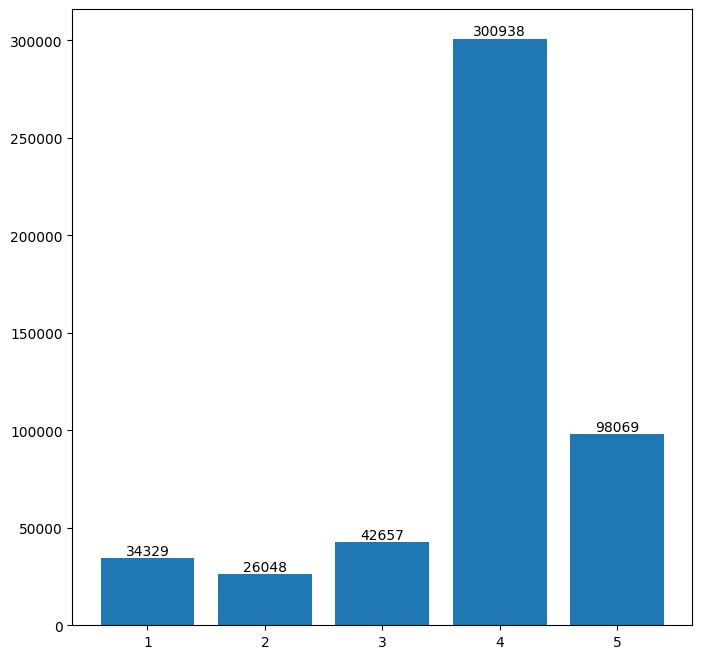

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['review'].unique(), df_all_data_processed['review'].value_counts())
ax.bar_label(bars)
plt.show()

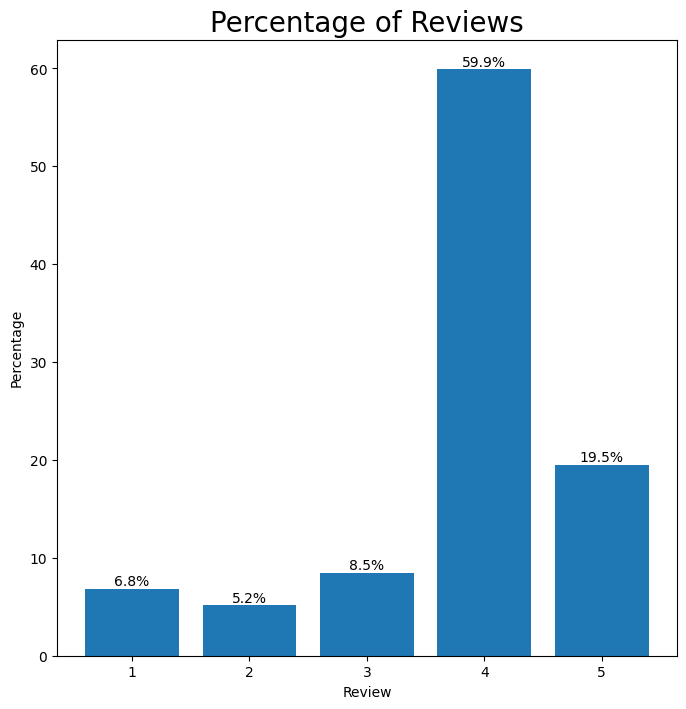

In [89]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['review'].unique(), (df_all_data_processed['review'].value_counts())/(df_all_data_processed['review'].value_counts().sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

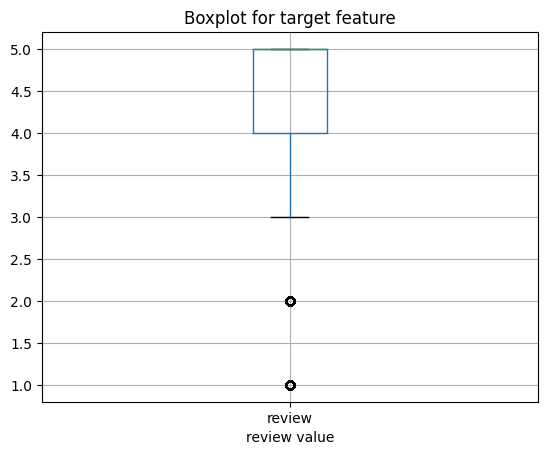

In [90]:
#Create a box plot to check for outliers, median and quartiles
df_all_data_processed.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [91]:
df_all_data_processed['review'].describe().T

count    502041.000000
mean          4.205557
std           1.210410
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.4% of the entries with a High/Postive review [4, 5]. Only 12% of the entries have a Low/Negative review [1, 2]. And 8.5% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile above 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [92]:
categories = df_all_data_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 502142 entries, 0 to 502040
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
502142 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [93]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 10


In [94]:
categories_counts = categories.value_counts()
print(f'Total of entries after explode category column {categories_counts.sum()}')

Total of entries after explode category column 502142


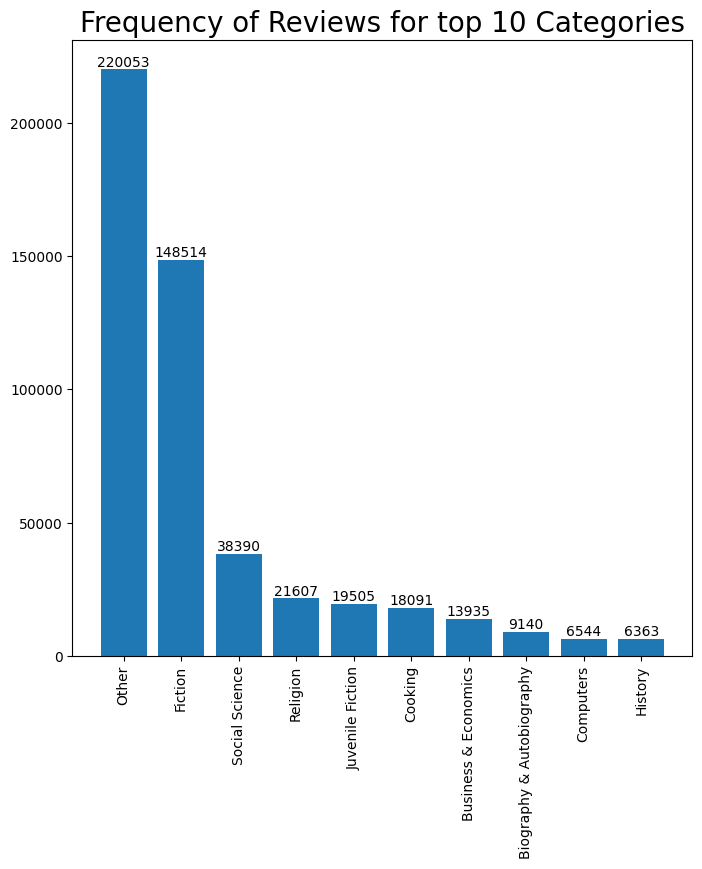

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['categories'].explode().unique(), df_all_data_processed['categories'].explode().value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

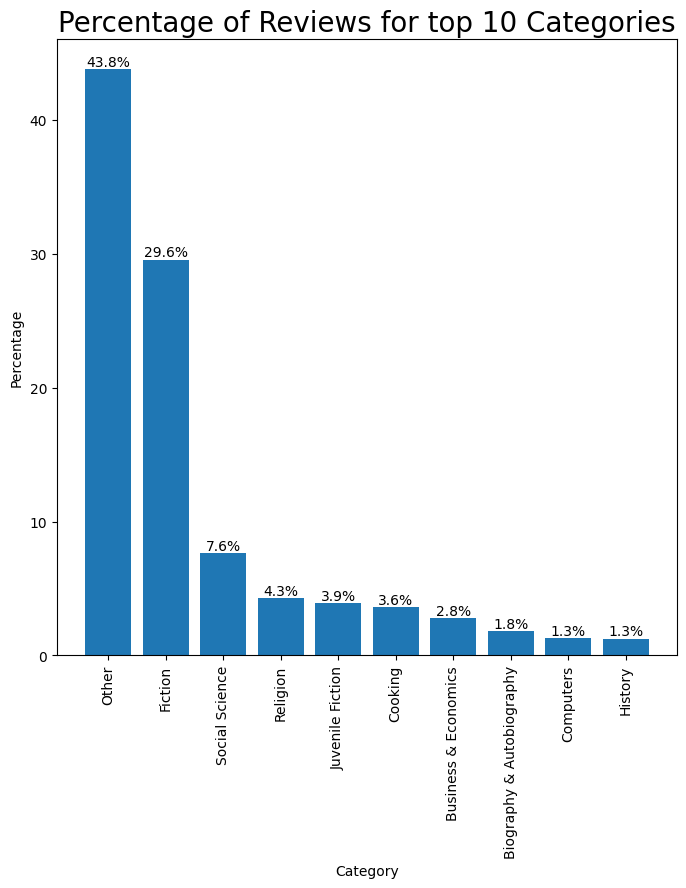

In [96]:
#Show a barplot by Percentages
category_percetage = df_all_data_processed['categories'].explode().value_counts()/df_all_data_processed['categories'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['categories'].explode().unique(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

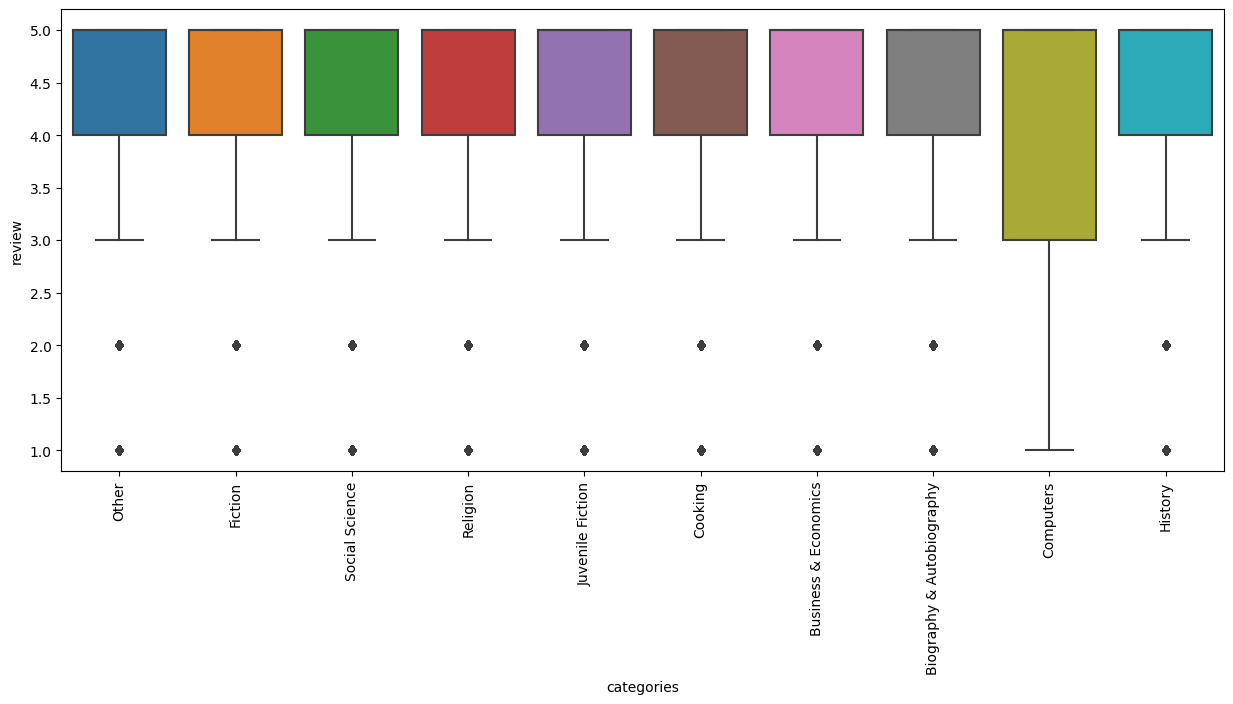

In [97]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=df_all_data_processed.explode('categories'))
plt.xticks(rotation=90)
plt.show()

In [98]:
df_all_data_processed['categories'].explode().unique()

array(['Other', 'Fiction', 'Social Science', 'Religion',
       'Juvenile Fiction', 'Cooking', 'Business & Economics',
       'Biography & Autobiography', 'Computers', 'History'], dtype=object)

### Key Findings for Categories:

- There are 10 different Categories in the Dataset.
- All of the reviewed categories contains reviews values in the 5 Categories [1, 2, 3, 4, 5]. All of the are biased to high review score.
- All categories but 'Computers' have lower quartile limit in Rating of 4 and minimum values of 3, but with outliers in 1 and 2 score reviews groups. 'Computers have the 25% quartile of 3 and minimum of 1.
- 'Fiction' is most rated category after grouped 'Others'. This category is biased to High review scores, having the mean on 4.5. And the 25% quartile on 4.

## Authors

In [99]:
authors = df_all_data_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 502909 entries, 0 to 502040
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
502909 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [100]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 10


In [101]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 502909


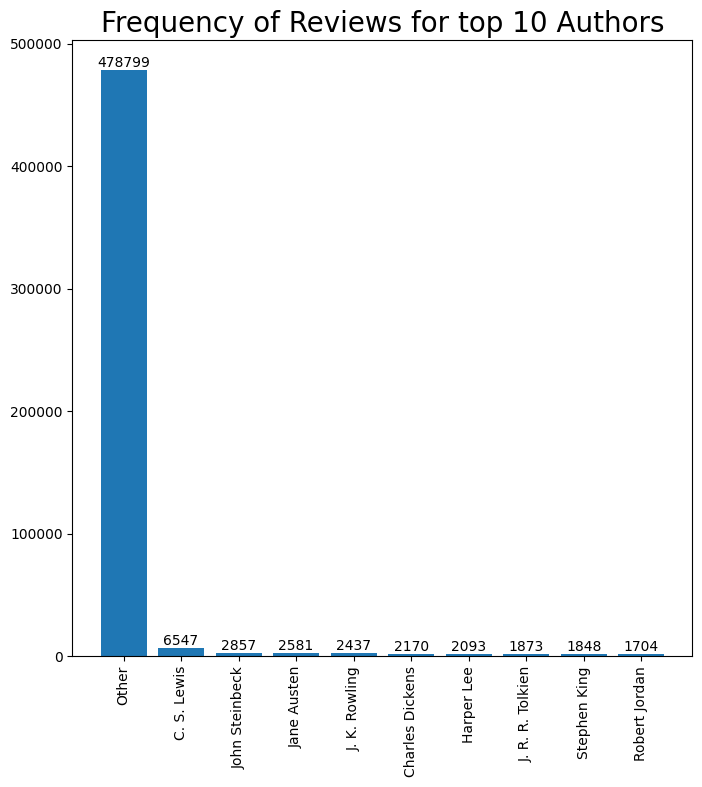

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['authors'].explode().unique(), df_all_data_processed['authors'].explode().value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Authors', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

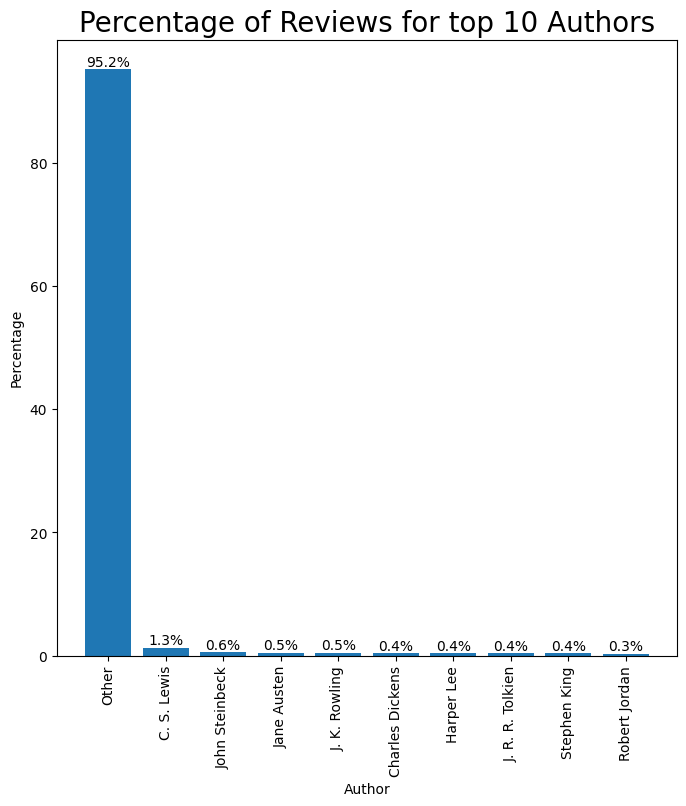

In [103]:
#Show a barplot by Percentages
author_percetage = df_all_data_processed['authors'].explode().value_counts()/df_all_data_processed['authors'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['authors'].explode().unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()


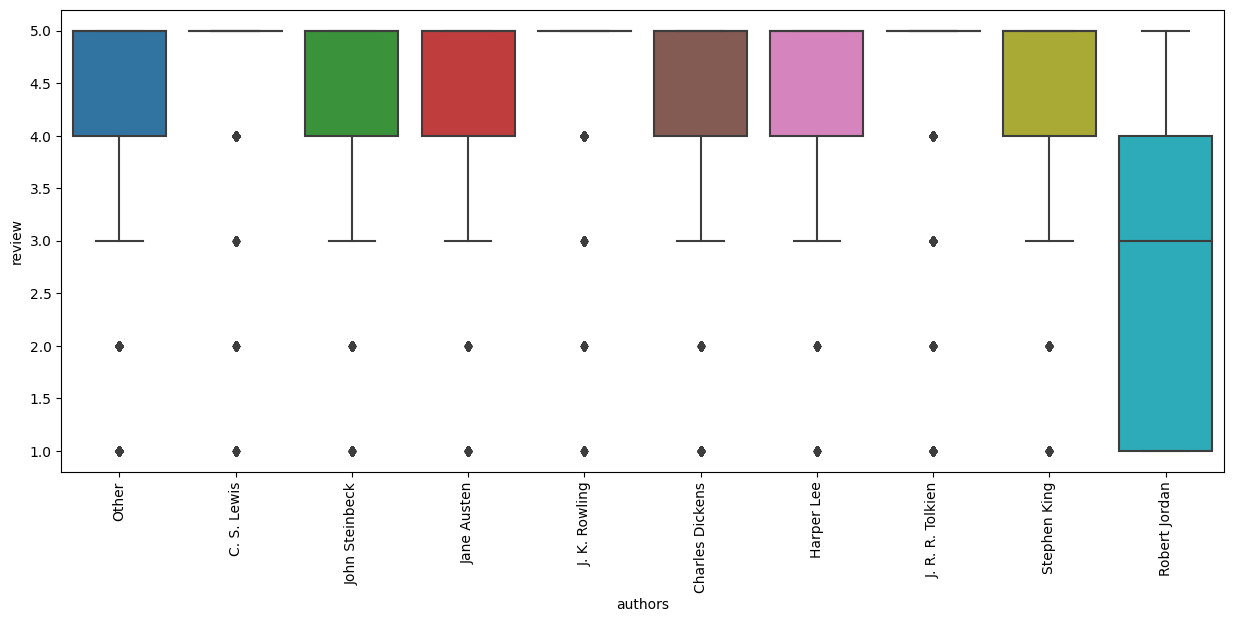

In [104]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='authors', y='review', data=df_all_data_processed.explode('authors'))
plt.xticks(rotation=90)
plt.show()

### Key Findings for Authors

- All of the reviewed authors contains reviews values in the 5 review scores [1 , 2, 3, 4, 5]. All of the authors but Robert Jordan, are biased to high review score. J. R. R. Tolkien, J.K Rowling and C.S. Lewis show the 25%, 50% and 75% quartiles of 5 review score. Robert Jordan has a review score more balanced, with the median on 3 and de quartile 75% under 4.
- Others authors represent the 95.2% of the Dataset. 


## Published Year

In [105]:
pub_year = df_all_data_processed[['published_year','review']]
pub_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502041 entries, 0 to 502040
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   published_year  502041 non-null  int64  
 1   review          502041 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 7.7 MB


In [106]:
pub_year = pub_year.groupby('published_year')['review'].agg(['mean', 'count']).reset_index()
pub_year

,published_year,mean,count
0,101,4.066667,15
1,1016,1.000000,1
2,1580,4.066667,15
3,1581,5.000000,1
4,1598,4.526316,19
...,...,...,...
277,2019,4.240392,8274
278,2020,4.265424,8850
279,2021,4.202281,9645
280,2022,4.200569,2812


In [107]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [108]:
pub_year = pub_year[pub_year['published_year']>pd.Timestamp.min.year]

In [109]:
pub_year['published_year'].describe().T

count     268.000000
mean     1884.328358
std        86.269396
min      1682.000000
25%      1822.750000
50%      1889.500000
75%      1956.250000
max      2023.000000
Name: published_year, dtype: float64

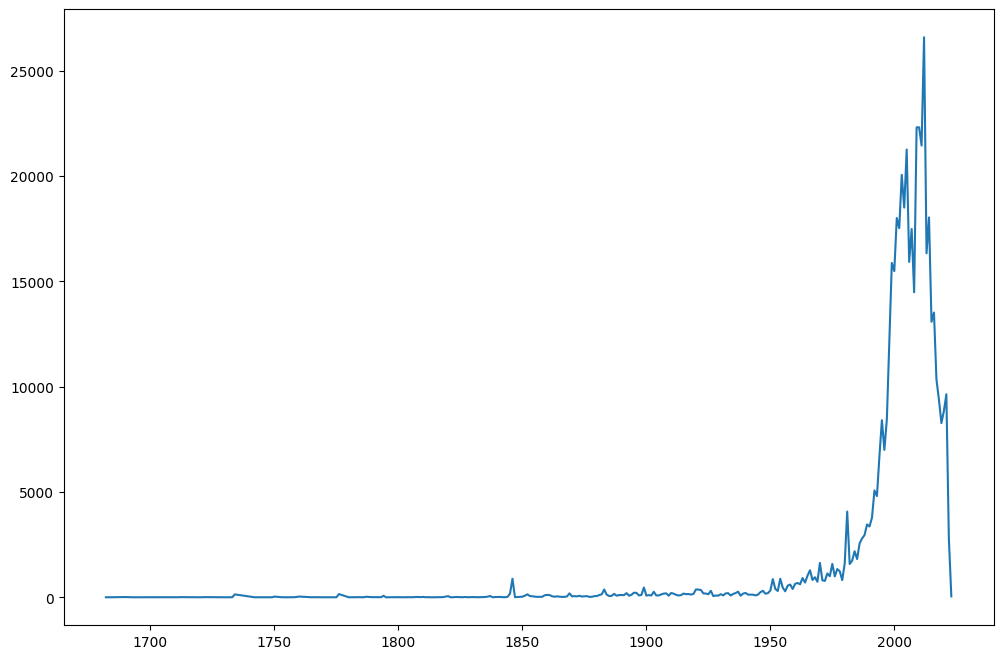

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['count'], linestyle='-')
plt.show()

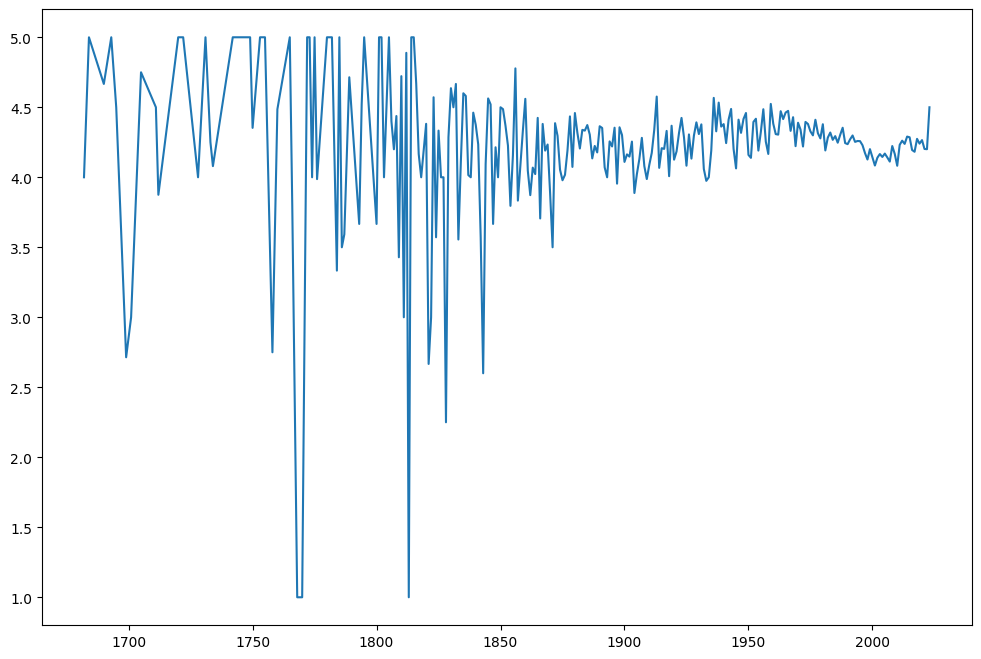

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['mean'], linestyle='-')
plt.show()

In [112]:
pub_year_counts = df_all_data_processed['published_year'].value_counts(ascending=False)
top_10_pub_year_counts = pub_year_counts[:10].sort_values(ascending=False)
top_10_pub_year_counts

published_year
2012    26599
2010    22324
2009    22319
2011    21456
2005    21266
2003    20065
2004    18511
2014    18041
2001    18014
2002    17535
Name: count, dtype: int64

In [113]:
other_pub_year_counts = pub_year_counts[10:].sum()
other_pub_year_counts

295911

In [114]:
top_pub_year_with_other = pd.concat([top_10_pub_year_counts, pd.Series({'Other': other_pub_year_counts})])
top_pub_year_with_other = top_pub_year_with_other.groupby(top_pub_year_with_other.index).sum()
top_pub_year_with_other = top_pub_year_with_other.sort_values(ascending=False)
top_pub_year_with_other

Other    295911
2012      26599
2010      22324
2009      22319
2011      21456
2005      21266
2003      20065
2004      18511
2014      18041
2001      18014
2002      17535
dtype: int64

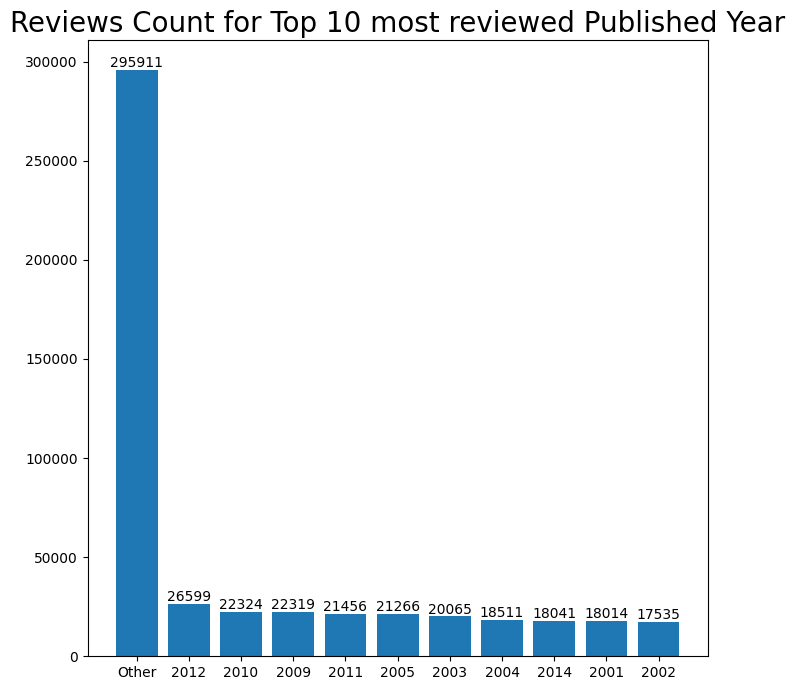

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), top_pub_year_with_other)
ax.bar_label(bars)
plt.title('Reviews Count for Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

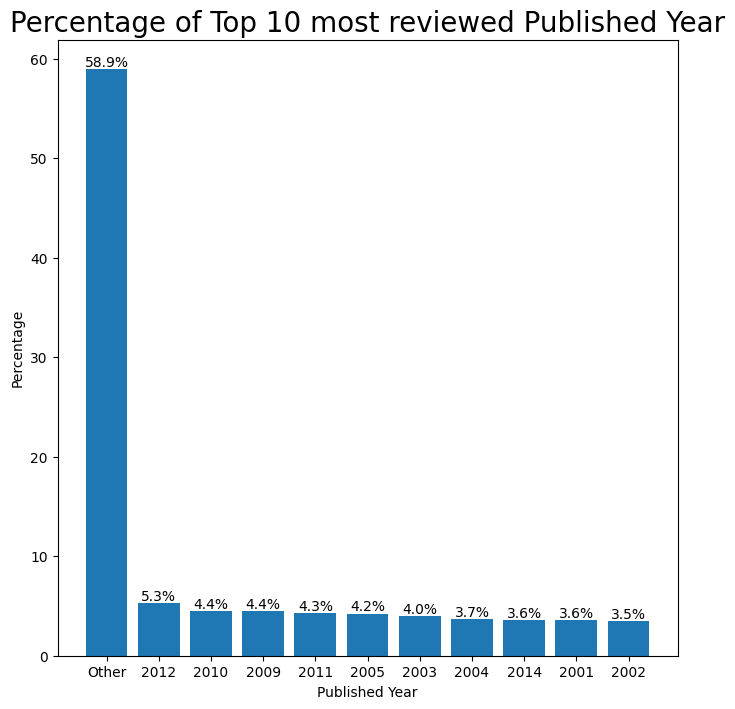

In [116]:
#Show a barplot by Percentages
pub_year_percetage = top_pub_year_with_other/pub_year_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), pub_year_percetage)

ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Published Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

## Helpfulness

In [117]:
df_all_data_processed.sample(2)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
75321,[Other],[Biography & Autobiography],Other,2002,2003,1.00,book gives new insight every day life hitler e...,0.7351,5.0
45153,[Other],[Juvenile Fiction],Penguin,2004,2000,0.75,definitely gripping thriller kids mayers illus...,0.9240,4.0


In [118]:
df_all_data_processed['helpfulness'].describe().T

count    502041.000000
mean          0.789836
std           0.317508
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness, dtype: float64

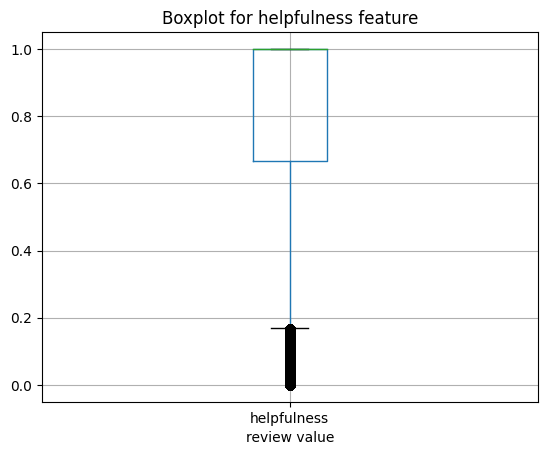

In [119]:
#Create a box plot to check for outliers, median and quartiles 4/6 0/0 1/3 5/5
df_all_data_processed.boxplot(column='helpfulness')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness feature")
plt.show()

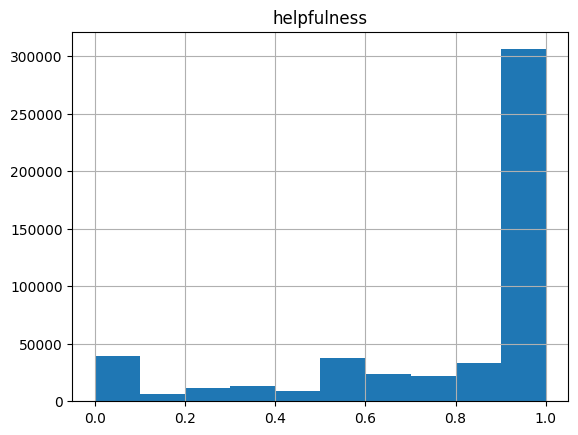

In [120]:
df_all_data_processed.hist(column='helpfulness')
plt.show()

In [121]:
#Correlation Analysis 
df_all_data_processed[['helpfulness','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness,review
helpfulness,1.000000,0.302752
review,0.302752,1.000000


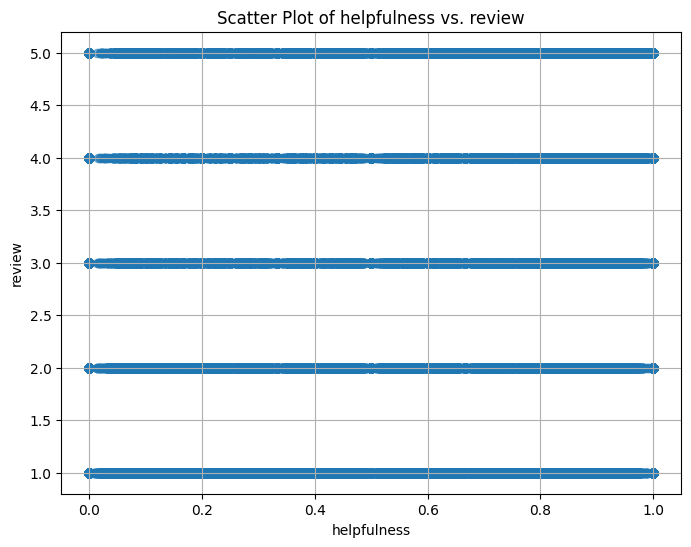

In [122]:
#Check helpfulness agains review 
plt.figure(figsize=(8, 6))
plt.scatter(df_all_data_processed['helpfulness'], df_all_data_processed['review'], alpha=0.5) 

# Set labels and title
plt.xlabel('helpfulness')
plt.ylabel('review')
plt.title('Scatter Plot of helpfulness vs. review')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.show()

#FIXME Numerica vs Numerica debe ser un scatterplot

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)


<Figure size 1000x1000 with 0 Axes>

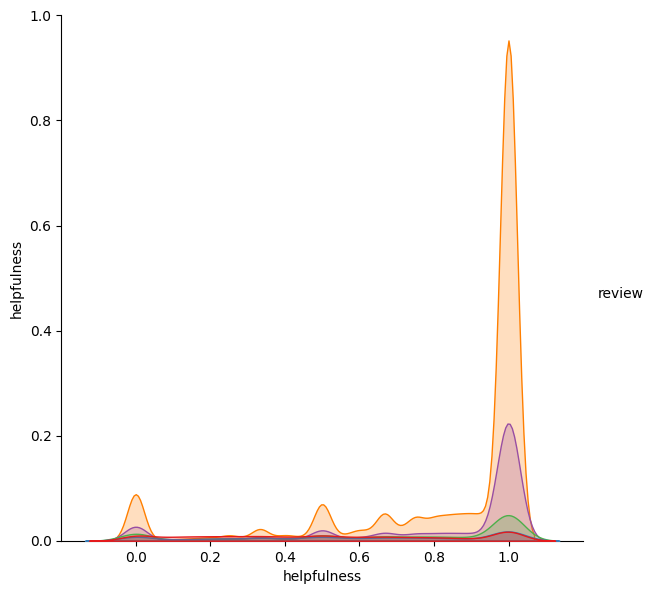

In [123]:
category_palette = sns.color_palette("Set1")
plt.figure(figsize=(10, 10))
sns.pairplot(data=df_all_data_processed[['helpfulness','review']], palette=category_palette,markers=["o", "s", "D"], hue="review", height=6)
plt.show()

## EDA for Review Text Column

In [124]:
pd.set_option('display.max_colwidth', 150)

In [125]:
df_all_data_processed[df_all_data_processed['review']==5]['text_clean'].sample(5, random_state=1299)

442115                                             ordered study small role community theater production far good interesting see playwrights words seeing film
490255    anne island funny romantic realistic novel still growing up decide ready love not makes every situation funny cheerful experience taught lot inste...
330615    story james mcbride black man white formerly orthodox jewish mother ruth mcbride fascinating moving mcbride adept describing details life grew per...
65313     books basics guide come home hospital actually brought book hospital found handy recovering csection still refer even baby  month oldthe book divi...
160882    honestly purchased long way nick hornby expecting lesser novel turns enjoyed more british vernacular got nerves while? cant say sureokay losers cl...
Name: text_clean, dtype: object

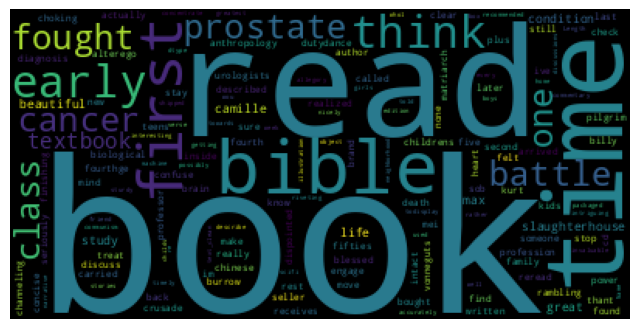

In [126]:
wordcloud5 = WordCloud(max_words=1000).generate(str(df_all_data_processed[df_all_data_processed['review']==5]['text_clean']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [127]:
df_all_data_processed[df_all_data_processed['review']==1]['text_clean'].sample(5, random_state=1299)

296028                                                                                                            started reading book see wasting anymore time
71910     hohum another work fabrication paragon virtue dick morris without him would hookers specialize toes sucked find paying customer? stupid andor corr...
17647                                                             place book reviews religious nonreligious opinion airing stick books christian bashing please
13591     fast read however book akin compendium previously published magazine articles consequently makes oeuvre  term paper reading book paul allen demyst...
92056                                                                               to loan people like lousy story poorly told hugh cast unlikeable characters
Name: text_clean, dtype: object

In [128]:
df_all_data_processed[df_all_data_processed['review']==3]['text_clean'].sample(5, random_state=1299)

379860                                                     book good pictures findings however getting book learn basics beadwork book good one would recommend
85053     purchased book woody guthrie love bob dylan know woody big influence dylani liked book general lot book interest found bored take note interest bo...
442361    enjoy read simple plot characters educated socialized welldressed coiffuredjust right everything harvard university; right novel numbers africanam...
61988                                                                               book nice read enjoyable read curiosities unfortunately look deeper subject
317843    small nonprofit company work needed website drew short straw designing maintaining it bought studio mx suite hoped book would cover everything nee...
Name: text_clean, dtype: object

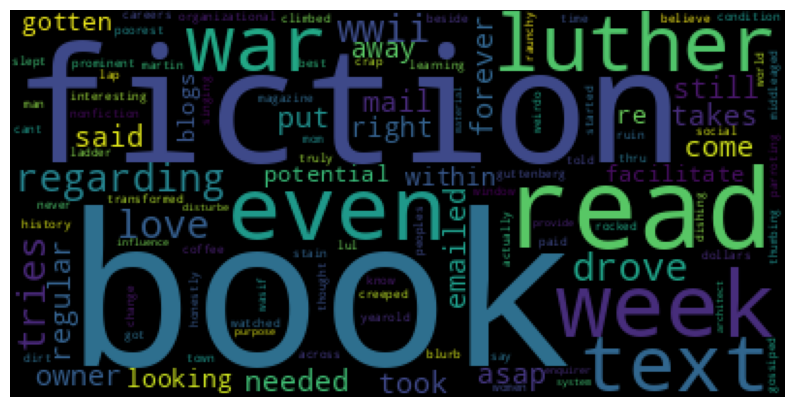

In [129]:
wordcloud1 = WordCloud(max_words=1000).generate(str(df_all_data_processed[df_all_data_processed['review']==1]['text_clean']))

fig = plt.figure(figsize=(10,8))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

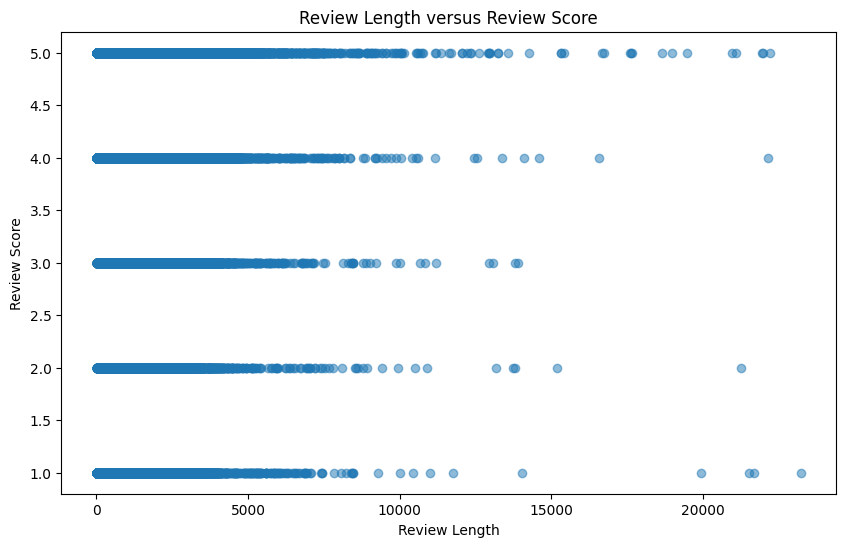

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all_data_processed['text_clean'].str.len(), df_all_data_processed['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [131]:
df_all_data_processed['text_clean'].str.len().mean()

538.3794473725096

In [132]:
df_all_data_processed['text_clean'].str.len().std()

645.9636795409724

In [133]:
long_reviews = df_all_data_processed[df_all_data_processed['text_clean'].str.len() > 2000].copy()

len(long_reviews)

17116

In [134]:
long_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
published_year,17116.0,1999.302816,30.057488,101.0,1998.000000,2005.000000,2012.0000,2023.0
review_year,17116.0,2006.031199,3.704711,1996.0,2003.000000,2006.000000,2009.0000,2013.0
helpfulness,17116.0,0.818459,0.249033,0.0,0.714286,0.930495,1.0000,1.0
compound_sentiment,17116.0,0.548686,0.763004,-1.0,0.615175,0.982400,0.9949,1.0
review,17116.0,4.115623,1.169587,1.0,4.000000,5.000000,5.0000,5.0


In [135]:
long_reviews['text_clean'].str.len().mean()

2966.4876723533534

In [136]:
short_reviews = df_all_data_processed[df_all_data_processed['text_clean'].str.len() < 200].copy()

len(short_reviews)

152355

In [137]:
short_reviews['text_clean'].str.len().mean()

120.60962882740967

In [138]:
short_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
published_year,152355.0,2000.220078,27.675016,101.0000,1998.0000,2006.0000,2012.000,2023.0000
review_year,152355.0,2006.797315,5.135680,1969.0000,2002.0000,2008.0000,2012.000,2013.0000
helpfulness,152355.0,0.755941,0.367734,0.0000,0.5000,1.0000,1.000,1.0000
compound_sentiment,152355.0,0.570435,0.424364,-0.9951,0.4215,0.7351,0.875,0.9931
review,152355.0,4.332342,1.163177,1.0000,4.0000,5.0000,5.000,5.0000


In [139]:
high_reviews = df_all_data_processed[df_all_data_processed['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

493.6053546268974

In [140]:
neutral_reviews = df_all_data_processed[df_all_data_processed['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

642.2337482710926

In [141]:
low_reviews = df_all_data_processed[df_all_data_processed['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

515.2910076029013

<Figure size 1000x600 with 0 Axes>

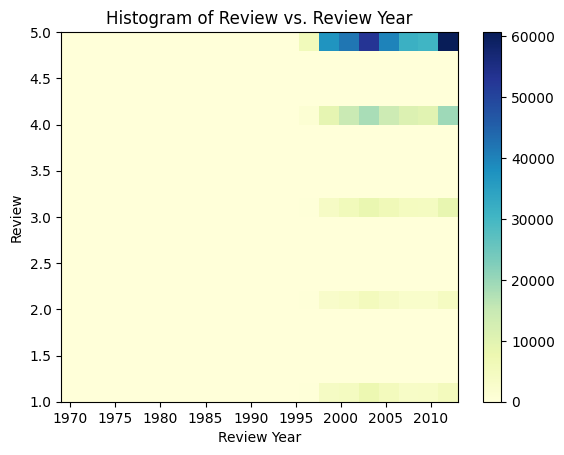

In [142]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.figure()
plt.hist2d(df_all_data_processed['review_year'], df_all_data_processed['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

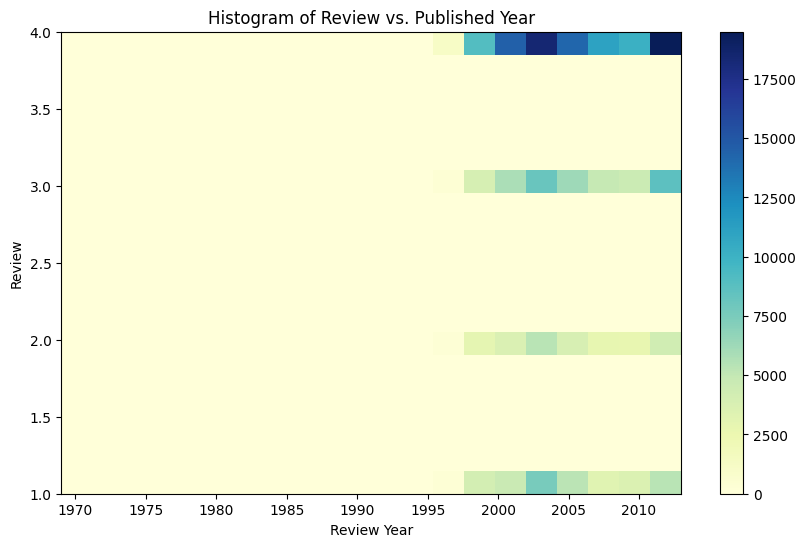

In [143]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data_processed[df_all_data_processed['review'] != 5]['review_year'], df_all_data_processed[df_all_data_processed['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

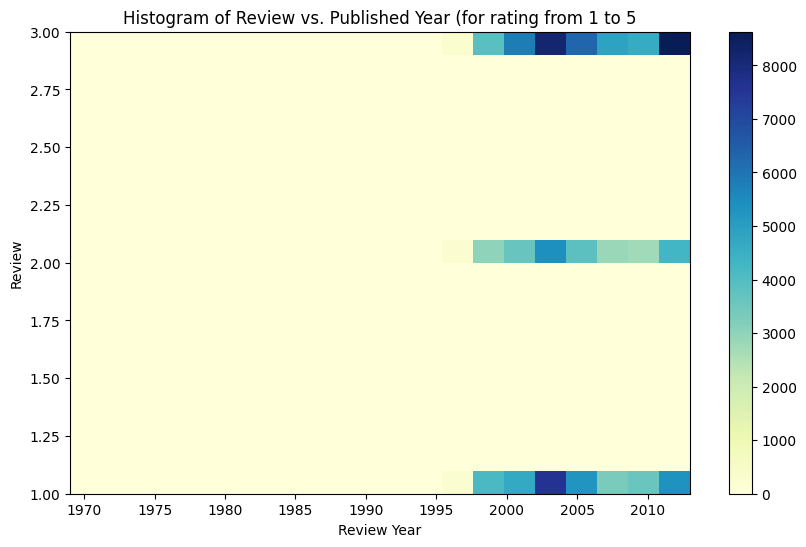

In [144]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data_processed[(df_all_data_processed['review'] != 4) & (df_all_data_processed['review'] != 5)]['review_year'], df_all_data_processed[(df_all_data_processed['review'] != 4) & (df_all_data_processed['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

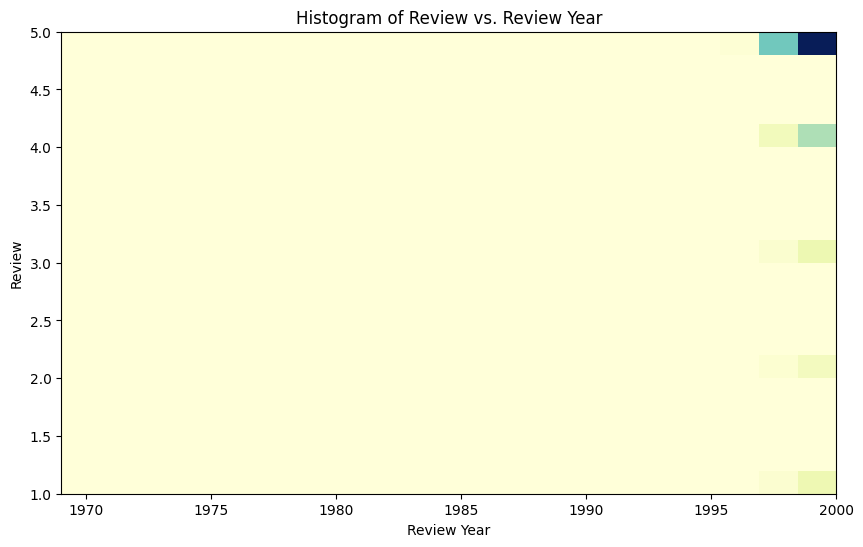

In [145]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data_processed[df_all_data_processed['review_year'] <= 2000]['review_year'], df_all_data_processed[df_all_data_processed['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()